<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [54]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [55]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#Task 1

In [84]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#Task 2

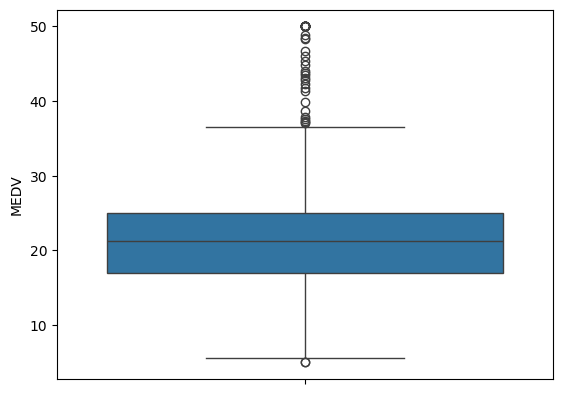

In [86]:
#boxplot for Median value of owner-occupied homes

medv = pd.DataFrame(boston_df["MEDV"])
ax = sns.boxplot(y="MEDV",data=  medv)


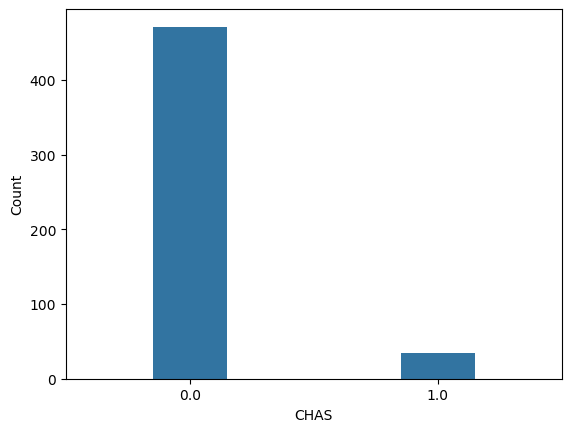

In [85]:
#bar plot for the Charles river variable

chas = boston_df.groupby('CHAS').count()
chas_1 = pd.DataFrame(chas['CRIM'])
chas_1.rename(columns = {'CRIM':'Count'},inplace=True)
by = sns.barplot(x='CHAS',y = 'Count', data = chas_1, width = 0.3)

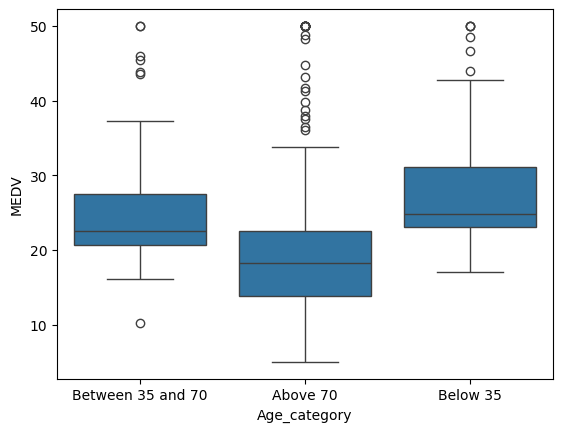

In [87]:
#boxplot for the MEDV variable vs the AGE variable.

x = list()
for i in range(len(boston_df)):
    if boston_df['AGE'][i]<=35:
        x.append('Below 35')
    elif boston_df['AGE'][i]<70:
        x.append('Between 35 and 70')
    else:
        x.append('Above 70')
boston_df1 = boston_df.copy()
boston_df1['Age_category'] = x
plot1 = sns.boxplot(x='Age_category',y='MEDV', data=boston_df1)

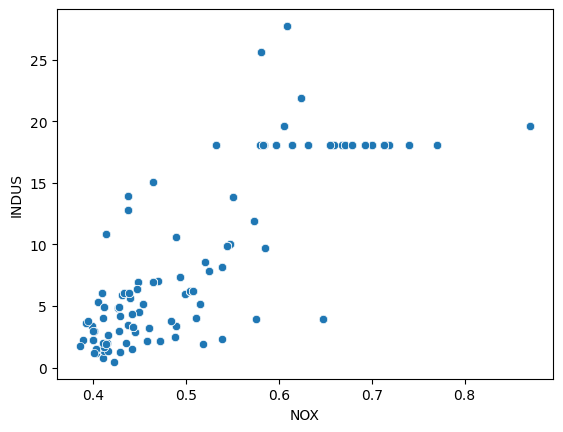

In [88]:
#scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

boston_df2 = boston_df[['NOX','INDUS']]
plot2 = sns.scatterplot(x='NOX',y='INDUS',data=boston_df2)

#### The Nitric Oxide concentrations are positively correlated to the proportion of non-reatail business acres.

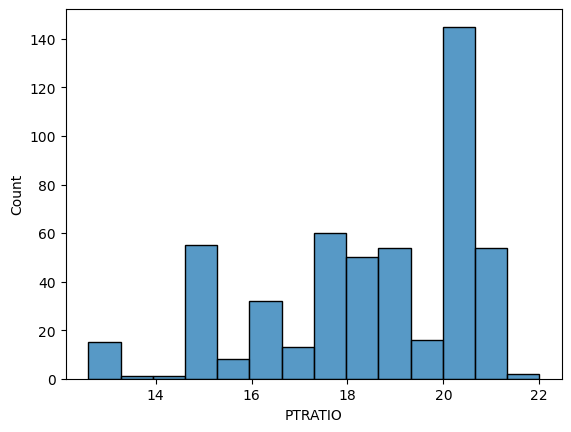

In [89]:
#histogram for the pupil to teacher ratio variable

boston_df3 = boston_df[['PTRATIO']]
plot4 = sns.histplot(x = 'PTRATIO',data=boston_df3)

#Task 3

In [76]:
# Null hypothesis: variance of median value of houses with Charle's river is equal to value of houses without the river
# alpha = 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=True)

# P-value of the statistics is 0.000074 which is less than 0.05, hence we reject the null hypothesis.
# Implies, that median value of houses is dependent on Charle's river.

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [80]:
# Null hypothesis: means of median value of houses is same for all age categories
# alpha  0.05

scipy.stats.f_oneway(boston_df1[boston_df1['Age_category']=='Below 35']['MEDV'], boston_df1[boston_df1['Age_category']=='Between 35 and 70']['MEDV'],
                    boston_df1[boston_df1['Age_category']=='Above 70']['MEDV'])

#P-value of the annova test is less than 0.05, hence we reject the null hypothesis
# Implies, that there are differences median value of houses for each age category.

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [82]:
# Null hypothesis: there is no correlation between nitric oxide concentrations and proportion of non-retail business in town.
# alpha = 0.05

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# We can see that the correlation statistic being closed to 1 (i.e 0.76) and p-value being significantly less than 0.05
# This implies, that there is a strong postive relation between nitric oxide concentrations and proprotion of non-retails business in town.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [90]:
# Regression Analysis - Null hypothesis : No relation between MEDV and DIS data.
# alpha = 0.05

x = boston_df['DIS']
y = boston_df['MEDV']

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

# Based on our regression analysis model we can see that p-value is less than 0.05 and correlation coefficient is 0.855 (sq. root of 0.732).
# This implies, that the median value of owner occupied homes strongly positively co-related.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):                   1.52e-146
Time:                        23:52:51   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""